# Offense vs Defense in the NBA: the ultimate debate. 

### *Is being perfect at both really necesary to win it all?*

![title](images/harden.jpeg)

*Pictured Above*: James Harden, one of the most prolific players of his era is well on his way to become one of the best offensive players to ever play the game. His deffense however left many fans questioning whether he and his offense-heavy team could ever pull off the championship during his time in Houston. 

### Intro

We’ve all heard it before: Offenses win games, defenses win championships. At least in popular sports like Baseball, playing defense looks completely different from playing offense. In American Football, there are literally two different sets of people playing 2 completely different sports. Each unit requires a completely different set of skills and players are not expected to play both disciplines. Compare this with sports like Football(Soccer)and Basketball, where players are expected to play both positions. In a matter of seconds, the game switches from offense to defense and back to offense, demanding that players remain ready to guard a player. In this context, an extremely talented shooter might be a liability in defense. This has been a struggle since the beginning of the game, because coaches know that any player that steps into the court will need to step up his defense.

So really, how important is a team’s defense compared to its offense? Can a team compensate a bad defense with killer offense? This might seem like a trivial question, but its implications are real. Teams have limited resources (salary) as well as a limited number of roster spots, so GM's (General Managers) and Head Coaches are faced with decisions. 


### About the project
There has been a recent revolution in major sports: that of incorporating data into not only the way they play the game, but the way they train, eat and sleep. This has led to "rosters with more skilled, more well-rounded players that are better rested, and increased the profitability of the NBA."(randerson112358) NBA teams are investing huge amounts of resources into data-based decision making and that is only going to get bigger. This project will try to give some insight into one of the biggest dichotomies in modern sports, and will hopefully lead to useful insights about the game and the players that shape it. 

#### Who will be directly affected by the creation of this project?

The implications of effectively solving a problem like this start at a player level, but it goes as far as organization level. To give an example, if projects like this one consistently find that offensive heavy teams can consistently win and get into the playoffs without having a good defense, organizations might be inclined to focus their attention into scouting and developing offensively skilled players. The inverse can also be true, where teams might realize that investing the time and effort into finding good defensive players is “easier” than offensively skilled players and projects like this show that a good offense is practically indistinguishable from a good defense when we see team success. 

Teams can start adjusting scouting location, training camps, rosters, lineups and even plays during the game if they realize that one of the two is heavily underrated in team success. The main point here is that organizations are trying build teams that deliver *results* and we want to learn more about what a prototypically good team looks like and how well we can distinguish one by looking at offense and defense. 

#### What business problem(s) will this Data Science project solve for the organization?

A small to medium market team might be halfway through the season wondering if they have what it takes to have a winning Season. Winning Seasons provide teams the opportunity to climb the standings and make it to the playoffs, so it is important for a team to know whether the roster could be able to end up winning more games or not as it is. If a team decides that its current roster doesn’t have what it takes for the rest of the season, it could trade players and look for better opportunities so it is important to understand what makes a good team win and how a good team looks. 

#### What problems are inside the scope of this project?

We’re not going to be able to solve a problem as big as this with one project. This project is meant to provide insight about how performance translates into results. Understanding what a good team looks like in both defense and offense will lead to very important problems that we’ll have to deal with. 

#### What problems are outside the scope of this project?

Answering questions like, “should teams be making more midrange or paint shots?” Are out of the scope of the project. Even though we have information about the shooting locations and effectiveness from every area, we won’t delve into models with different shooting locations. We want to feed the different shooting shooting performances by zone to our models, and if we do get insights about them that would be really good, but that is not the point or the objective of this project. 

#### What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?

Understanding what a good “playoff” team looks like with a model can be tested with the current NBA season. As of March 28, 2021 we don’t know how teams will end their season. The trade deadline is already past so teams don’t really have an opportunity to change their teams now, but it will be really interesting to test out the models on an ongoing season. 




![title](images/klay.jpeg)

## In comes the data

Let’s Try to answer this question with NBA stats. The NBA has a way of accessing every single STAT you could think of in their webpage . You can have a lot of fun without writing a single line of code just by looking at the data in their page: https://www.nba.com/stats/ For this project I will be using two different sets of data: One that measures teams’ offensive performance and one that measures teams’ defensive performances. Let´s take a look at what these 2 different data sets look like.

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

team_shooting = pd.read_csv('data/team.csv') #Offensive Dataset
opponent_shooting = pd.read_csv('data/opposing.csv')#Defensive Dataset

### Team Shooting by Zone (Offense)
The first dataset tracks teams’ offensive performances in other words, how good teams shot the ball. Each row represents a different team and the columns contain information about ***that team’s*** shooting during ***1 NBA complete season***. The data is divided by shooting zones, so we have information on how well teams shot in the left corner 3, or in the midrange for example. The screenshot of our dataset shown below, shows how well the Atlanta Hawks and 6 other teams shot the ball in the 2020 season. In the NBA’s page we can then toggle the 2019 season and see the offensive performance for that season. I went ahead and concatenated every season spanning back to 1997 into a single data frame, so at the end of the day each row is a different historical team (2010 Rockets is a different team from the 2012 rockets) and how well that team shot the ball that season. You can think of each row as a report card for the complete season.

In [290]:
team_shooting.head()

,TEAM,RA FGM,RA FGA,RA FG%,PAINT FGM,PAINT FGA,PAINT FG%,MIDRANGE FGM,MIDRANGE FGA,MIDRANGE FG%,...,RIGHT CORNER FG%,CORNER 3 FGM,CORNER 3 FGA,CORNER 3 FG%,ATB 3 FGM,ATB FGA,ATB FG%,YEAR,SEASON WIN PCT,PLAYOFFS
0,Atlanta Hawks,746,1206,61.9,313,756,41.4,174,399,43.6,...,33.3,130,332,39.2,436,1220,35.7,2021,0.511,1
1,Boston Celtics,710,1076,66.0,337,792,42.6,243,581,41.8,...,37.3,121,300,40.3,461,1225,37.6,2021,0.489,1
2,Brooklyn Nets,815,1220,66.8,317,686,46.2,200,438,45.7,...,37.3,153,385,39.7,508,1289,39.4,2021,0.674,1
3,Charlotte Hornets,765,1279,59.8,252,599,42.1,151,378,39.9,...,44.0,151,353,42.8,467,1242,37.6,2021,0.523,1
4,Chicago Bulls,795,1227,64.8,279,639,43.7,204,489,41.7,...,41.3,173,389,44.5,378,1070,35.3,2021,0.442,0


### NBA Glossary:
- **FGA**: Field Goal Attempted. The number of shots attempted. 
- **FGM**: Field Goal Made. The number of succesful shots. 
- **FG%**: Field Goal Percentage. The percentage of shots made.(FGM divided by FGA multiplied by 100)
- **Season Win PCT**: The number of games won divided by the number of games played. (A complete NBA Regular season has 82 games)
- **Playoffs**: Elimination tournament annually held after the National Basketball Association (NBA)'s regular season to determine the league's champion. In our data set, that is represented by a 1 if the team played in the playoffs or 0 if it didn´t.

Here are the basic shooting zones:

- **Corner 3:** The small area on the left and right side of the court near the baseline. The 3-point line is a few inches closer to the basket in the corners.
- **In The Paint:** These are shots taken inside the key, the rectangular box close to the basket that measures 15 feet out to the free throw line and 16 feet wide.
- **Restricted Area:** The four-foot area directly surrounding the basket, marked by a semicircle in the paint.
- **Mid-range:** Any shot that comes outside the paint but inside the 3-point line.
- **Above the Break 3:** Any 3-pointer that is not taken from the corners.

![title](images/zones.png)

### Opponent Shooting by Zone (Defense)
Here comes the cool part about the project. Instead of using the classic defensive performance parameters like steals and blocks, I found the same exact shooting data as the one above, only instead of containing numbers about the team’s own shooting, it contains their opponents shooting numbers. In other words, if I go to a random row, say the 2018 Boston Celtics, the row contains information about how well opposing teams shot the ball that season when playing against that Celtics team. And it’s exactly the same format as our offensive team performance information, so we get to see shot zones too. With this format we can notice defensive trends that we can’t see with the traditional info. Maybe the 2005 lakers were extremely good at stopping teams near the basket (their opponents’ paint numbers are hideous) but were really bad at guarding the three pointer(their opponents shot the triple better against them than the league average)


In [291]:
opponent_shooting.head()

,TEAM,RA FGM,RA FGA,RA FG%,PAINT FGM,PAINT FGA,PAINT FG%,MIDRANGE FGM,MIDRANGE FGA,MIDRANGE FG%,...,RIGHT CORNER FG%,CORNER 3 FGM,CORNER 3 FGA,CORNER 3 FG%,ATB 3 FGM,ATB FGA,ATB FG%,YEAR,SEASON WIN PCT,PLAYOFFS
0,Atlanta Hawks,801,1288,62.2,274,689,39.8,218,490,44.5,...,37.2,137,353,38.8,392,1157,33.9,2021,0.511,1
1,Boston Celtics,684,1049,65.2,338,768,44.0,210,498,42.2,...,38.7,143,365,39.2,432,1186,36.4,2021,0.489,1
2,Brooklyn Nets,765,1195,64.0,367,845,43.4,226,535,42.2,...,32.6,144,407,35.4,458,1226,37.4,2021,0.674,1
3,Charlotte Hornets,840,1280,65.6,209,481,43.5,126,336,37.5,...,38.2,221,549,40.3,433,1221,35.5,2021,0.523,1
4,Chicago Bulls,786,1251,62.8,299,652,45.9,238,531,44.8,...,42.6,125,296,42.2,361,1100,32.8,2021,0.442,0


### The idea

I will build two different classification models, one will only get offensive performance data and the other will only get defensive performance data. The target parameter, or the thing they’re trying to predict is whether a team is a winning team or not. A winning team is one that won more games than it lost in the season (Win pct > 0.5).

So just to recap, the idea is to feed teams’ shooting performance information as well as their winning record for the season (did they win a lot of games?) to the first model. Once it’s trained, feed it a random, mysterious team. The model will then try to answer the question: did this unknown team win a lot of games that season based on how they shot the ball?

Then, take all of the opponent shooting information and feed it to another model. The “defensive” model will have to classify whether the team had a winning or losing season based on the how well their opponents shot the ball when playing against them throughout that season. So this second model will have to classify whether this team won many games or not based only on how teams shot against them. The model won’t have any information about that random team’s shooting performance.

Then I will test both models to see how well they do with data they’ve never seen before. I will give both models information about a mystery season for a mystery team and they will have to tell me whether they think it was a winning season for the team or not. The models’ accuracy will tell us about the implications of good offense or defense.


## Data Exploration:

Let’s get started. Looking at the info() function, we can see that both the team and opposing shooting data frames have different datatypes, but other than that we can see already that there are no missing values in the dataframes: 

In [292]:
team_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 25 columns):
TEAM                742 non-null object
RA FGM              742 non-null int64
RA FGA              742 non-null int64
RA FG%              742 non-null float64
PAINT FGM           742 non-null int64
PAINT FGA           742 non-null int64
PAINT FG%           742 non-null float64
MIDRANGE FGM        742 non-null int64
MIDRANGE FGA        742 non-null int64
MIDRANGE FG%        742 non-null float64
LEFT CORNER FGM     742 non-null int64
LEFT CORNER FGA     742 non-null int64
LEFT CORNER FG%     742 non-null float64
RIGHT CORNER FGM    742 non-null int64
RIGHT CORNER FGA    742 non-null int64
RIGHT CORNER FG%    742 non-null float64
CORNER 3 FGM        742 non-null int64
CORNER 3 FGA        742 non-null int64
CORNER 3 FG%        742 non-null float64
ATB 3 FGM           742 non-null int64
ATB FGA             742 non-null int64
ATB FG%             742 non-null float64
YEAR                74

In [293]:
opponent_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 25 columns):
TEAM                742 non-null object
RA FGM              742 non-null int64
RA FGA              742 non-null int64
RA FG%              742 non-null float64
PAINT FGM           742 non-null int64
PAINT FGA           742 non-null int64
PAINT FG%           742 non-null float64
MIDRANGE FGM        742 non-null int64
MIDRANGE FGA        742 non-null int64
MIDRANGE FG%        742 non-null float64
LEFT CORNER FGM     742 non-null int64
LEFT CORNER FGA     742 non-null int64
LEFT CORNER FG%     742 non-null float64
RIGHT CORNER FGM    742 non-null int64
RIGHT CORNER FGA    742 non-null int64
RIGHT CORNER FG%    742 non-null float64
CORNER 3 FGM        742 non-null int64
CORNER 3 FGA        742 non-null int64
CORNER 3 FG%        742 non-null float64
ATB 3 FGM           742 non-null int64
ATB FGA             742 non-null int64
ATB FG%             742 non-null float64
YEAR                74

### Classify Winners and Losers

The `SEASON WIN PCT ` variable contains the number of wins divided by total games of any one team’s season. We need to convert this to Winner or Loser categories by using 0.5 as the threshold. 

In [294]:
team_shooting['Winning Season'] = team_shooting['SEASON WIN PCT'].map(lambda x: 0 if x < 0.5 else 1)
opponent_shooting['Winning Season'] = opponent_shooting['SEASON WIN PCT'].map(lambda x: 0 if x < 0.5 else 1)

In [295]:
team_shooting.head()

,TEAM,RA FGM,RA FGA,RA FG%,PAINT FGM,PAINT FGA,PAINT FG%,MIDRANGE FGM,MIDRANGE FGA,MIDRANGE FG%,...,CORNER 3 FGM,CORNER 3 FGA,CORNER 3 FG%,ATB 3 FGM,ATB FGA,ATB FG%,YEAR,SEASON WIN PCT,PLAYOFFS,Winning Season
0,Atlanta Hawks,746,1206,61.9,313,756,41.4,174,399,43.6,...,130,332,39.2,436,1220,35.7,2021,0.511,1,1
1,Boston Celtics,710,1076,66.0,337,792,42.6,243,581,41.8,...,121,300,40.3,461,1225,37.6,2021,0.489,1,0
2,Brooklyn Nets,815,1220,66.8,317,686,46.2,200,438,45.7,...,153,385,39.7,508,1289,39.4,2021,0.674,1,1
3,Charlotte Hornets,765,1279,59.8,252,599,42.1,151,378,39.9,...,151,353,42.8,467,1242,37.6,2021,0.523,1,1
4,Chicago Bulls,795,1227,64.8,279,639,43.7,204,489,41.7,...,173,389,44.5,378,1070,35.3,2021,0.442,0,0


Let’s explore our data frames a lit bit before we start working on models.

# Restricted Area vs Season Wins

Like the graphic and glossary explain, the Restricted area is the area just below the bucket. Every layup, Dunk or outback shot will count in this number. We’ll see how important this shot is later, but for now let’s use our dataframe to explore the importance of this shot.

The following plot shows teams represented as dots, where their `x` axis location represents how well their opponent shot the ball in the Restricted Area and the `y` axis location represents the win percentage that season. 

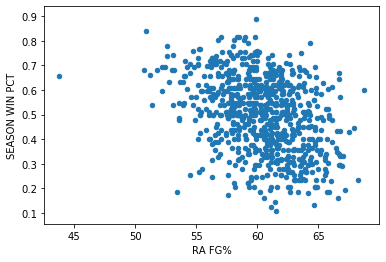

In [296]:
opponent_shooting.plot.scatter(x='RA FG%', y='SEASON WIN PCT')

We can see that the better they allow their opponents to shoot the ball in the RA (dots that tend to the right), the worse their winning record is (dots that are lower).

We can see that the inverse is true when we plot each team's own shooting performance against their winning percentage, where the higher the shot percentage, the higher their win percentage. 

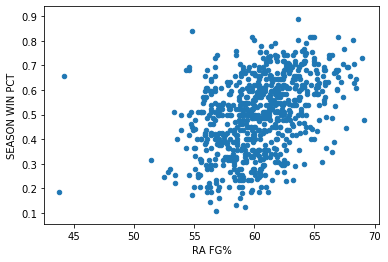

In [297]:
team_shooting.plot.scatter(x='RA FG%', y='SEASON WIN PCT')

# Shooting Throughout the years: the midrange is dead

Next, we’ll take a look at shot distributions for teams across the years. That is, we’ll compare and contrast what type of shots (location) teams have shot the most and try to understand the tendency. It has been widely known that players like Stephen curry (one could even argue that he’s the only  one to blame or thank) have revolutionized the game. Players shoot the ball from the 3pt line like never before. Let’s see if we can represent this with our data. 


In [298]:
def attempts_pct(df,year):
    
    '''This function takes in a datagrame and a year and returns the total number of times teams shot from
    that location in the selected year.'''
    
    specific = df.loc[df['YEAR'] == year]
    specific_attempts = specific[['RA FGA','PAINT FGA','MIDRANGE FGA', 'CORNER 3 FGA', 'ATB FGA']]
    specific_totals = specific_attempts.sum(axis = 0, skipna = True)
    return specific_totals

def plotbar(df,year1,year2):
    
    '''Plots a bar graph that compares the shooting locations for the specific locations. Takes in the opposing or team shooting
    dataframe as well as the years to compare and plots the bar graphs.'''
    
    specific_totals1 = attempts_pct(df,year1)
    specific_totals2 = attempts_pct(df,year2)
    
    specific_totals1 = specific_totals1.map(lambda x: (x/specific_totals1.sum()*100))
    specific_totals2 = specific_totals2.map(lambda x: (x/specific_totals2.sum()*100))
   
    compare_df = pd.DataFrame({'{}'.format(year1): specific_totals1,'{}'.format(year2): specific_totals2})
    compare_df.plot.bar(title = 'Distribution of Attempted Shots by Zone in the {} and {} NBA Seasons'.format(year1-1,year2)
                       ,figsize=(12,5))
    plt.xlabel('ZONE')
    plt.ylabel('Percentage of Shots Attempted')
    plt.show()
    print(compare_df)

The following plot compares the shot distribution for teams in 1997 and in 2018. We can see that the 1997 NBA (blue graphs) shot almost 40% of their shots from the midrange! That’s more than layups and dunk attempts. But the incredible part is how little teams shoot the midrange today. The orange and blue bars in the middle show this contrast. 

Where did these shots go? **Beyond the 3pt line**. As shown below, teams are shooting the ball ***%342** more 3pt shots than 20 years ago. Players have started to notice that even if the midrange has a better probability of going in than the 3pt shot, the risk-reward of shooting the ball just a few steps behind is much more convinient. 


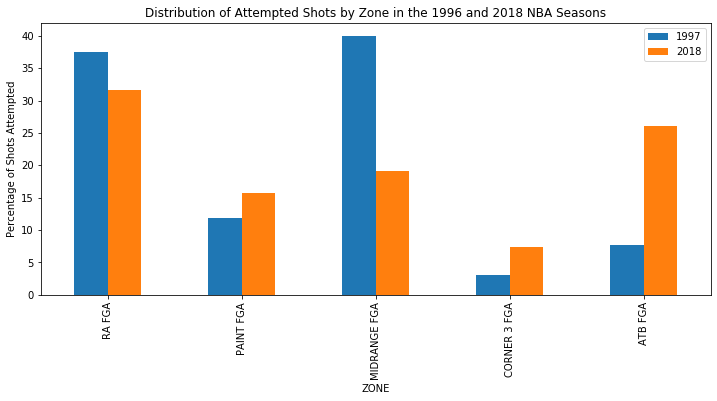

                   1997       2018
RA FGA        37.464832  31.666848
PAINT FGA     11.877993  15.741324
MIDRANGE FGA  39.969848  19.100022
CORNER 3 FGA   3.056024   7.391220
ATB FGA        7.631302  26.100586


In [299]:
plotbar(team_shooting,1997,2018)

This is not simply an anomaly: the 3pt craze is here to stay. The following plot shows that the 3pt numbers seen for the 2018 season have pretty much stayed the same. 

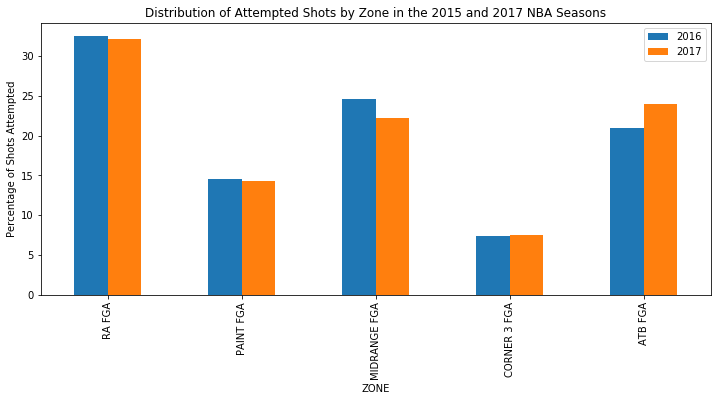

                   2016       2017
RA FGA        32.510014  32.129590
PAINT FGA     14.569083  14.240080
MIDRANGE FGA  24.647993  22.238934
CORNER 3 FGA   7.338530   7.482691
ATB FGA       20.934380  23.908705


In [300]:
plotbar(team_shooting,2016,2017)

In [301]:
def made(df,year):
    specific = df.loc[df['YEAR'] == year]
    specific_attempts = specific[['RA FGM','PAINT FGM','MIDRANGE FGM', 'CORNER 3 FGM', 'ATB 3 FGM']]
    specific_totals = specific_attempts.sum(axis = 0, skipna = True)
    return specific_totals
def plotbar2(df,year1,year2):
    attempts_totals1 = attempts_pct(df,year1)
    attempts_totals2 = attempts_pct(df,year2)
    
    made_totals1 = made(df,year1)
    made_totals2 = made(df,year2)
    
    pct1 = made_totals1.reset_index().drop('index',axis = 1).divide(attempts_totals1.reset_index().drop('index',axis = 1))
    pct2 = made_totals2.reset_index().drop('index',axis = 1).divide(attempts_totals2.reset_index().drop('index',axis = 1))
    
    index = ['RA','PAINT','MIDRANGE', 'CORNER 3', 'ATB 3']
    
    
   
    compare_df = pd.DataFrame({'{}'.format(year1): pct1[0],'{}'.format(year2): pct2[0],'ZONE': index})
    #compare_df.set_index(index)
    compare_df = compare_df.set_index('ZONE')
    print(compare_df)
    compare_df.plot.bar(title = 'FG% by Zone in the {} and {} NBA Seasons'.format(year1-1,year2)
                       ,figsize=(12,5))
    plt.xlabel('ZONE')
    plt.ylabel('FG%')
    #plt.show()

And interestingly enough, when we analyze how *well* teams have shot the ball throughout the years, we see that the % of shots made have stayed pretty consistently. That means, teams are not shooting the ball considerably better or worse, which further supports the argument that the 3pt shot is a much better bet than a long midrange shot. 

### FG% Throughout the Years

              1997      2017
ZONE                        
RA        0.547544  0.610991
PAINT     0.433724  0.417564
MIDRANGE  0.402518  0.402512
CORNER 3  0.398298  0.387212
ATB 3     0.334933  0.351474


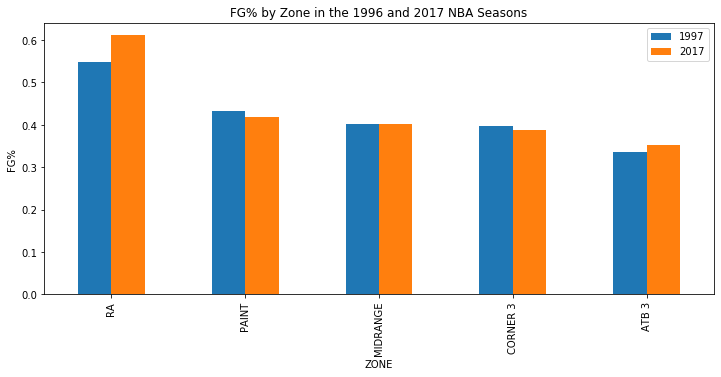

In [302]:
plotbar2(team_shooting,1997,2017)

You can see in the plot above that the the corner and above the break 3pt shot % have stayed in the same range. 

# Rockets' Shooting

Because I love the Houston Rockets, I was naturally curious to see how their shot distributiion has changed. Corner 3's are one of my favorite made shots because most of the times players that make these shots are wide open [Completely my perception from watching basketball on tv. This statement is not supported by evidence whatsover]. This means that ball movement and smart playmaking led to open 3's in the corner. Let's see how the rockets have shot from the corner throughout the years:

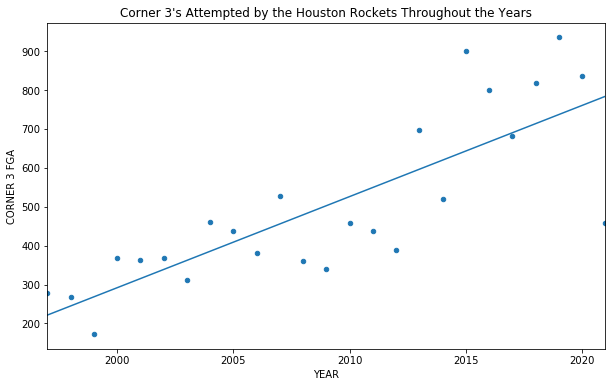

In [303]:
import numpy as np
rockets_shooting = team_shooting.loc[team_shooting['TEAM'] == 'Houston Rockets']
rockets_shooting = rockets_shooting.iloc[::-1]

z = np.polyfit(x=rockets_shooting['YEAR'], y=rockets_shooting['CORNER 3 FGA'], deg=1)
p = np.poly1d(z)
rockets_shooting['trendline'] = p(rockets_shooting['YEAR'])

ax = rockets_shooting.plot.scatter(x ='YEAR', y='CORNER 3 FGA', figsize=(10,6))
rockets_shooting.set_index('YEAR', inplace=True)
rockets_shooting.trendline.sort_index(ascending=False).plot(ax=ax)
plt.title('Corner 3\'s Attempted by the Houston Rockets Throughout the Years')
plt.show()


## Models
Now let's get to the fun part: **Modeling**. 

We'll explore a couple of Machine Learning models that will work well with what we're trying to achieve. For this we'll have to split the training and testing data first. 

### Split training data

First off, we have to acknowledge the fact that we have very few observations (<1k). This poses a challenge because our models may not have enough data to provide good enough models. We also have to consider that whatever number of observations will be further split into training and test data, so if we had 1000 observations and we wanted to split our data into 80:20 training to test ratio, we would really only have 800 observations to train our models. 



In [304]:
team_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 26 columns):
TEAM                742 non-null object
RA FGM              742 non-null int64
RA FGA              742 non-null int64
RA FG%              742 non-null float64
PAINT FGM           742 non-null int64
PAINT FGA           742 non-null int64
PAINT FG%           742 non-null float64
MIDRANGE FGM        742 non-null int64
MIDRANGE FGA        742 non-null int64
MIDRANGE FG%        742 non-null float64
LEFT CORNER FGM     742 non-null int64
LEFT CORNER FGA     742 non-null int64
LEFT CORNER FG%     742 non-null float64
RIGHT CORNER FGM    742 non-null int64
RIGHT CORNER FGA    742 non-null int64
RIGHT CORNER FG%    742 non-null float64
CORNER 3 FGM        742 non-null int64
CORNER 3 FGA        742 non-null int64
CORNER 3 FG%        742 non-null float64
ATB 3 FGM           742 non-null int64
ATB FGA             742 non-null int64
ATB FG%             742 non-null float64
YEAR                74

For this project I will split my train and test data in a planned way. Instead of using a random or stratified split, I will train my models in every season from 1997 to 2017 and leave the 
- The 2020-2021 season is still ongoing, we don't have target variables yet. We can't use this season to train or test.
- That leaves 712 observations available for training and testing. 
- Three test seasons equal 90 observations. This represents 12.6% of the total available data. 
- That leaves 622 observations for training. 

This is *Very* little data to work with, but let's see what we can do with the data. 


As usual, let's create a pipeline for our data preprocessing so that we can iterate through many differente combinations of models and test many versions without having to worry much about test splits, scales or separating target values from parameters:

In [305]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

def split(df1):
    '''Takes in a dataframe and the target value in string format as an argument and returns the same dataframe 
    but with the observations that will be used as test split removed. Those removed observations are also returned 
    in their own dataframe'''
    x_train = df1.loc[df1['YEAR'] < 2018]
    x_test = df1.loc[df1['YEAR'] >= 2018]
    return x_train, x_test

def scale(df2):
    '''Takes in dataframe and applies a scikit transformer to the dataframe in order to scale the parameters 
    with Scikit\'s StandardScaler. Returns the transformed dataframe '''
    df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
    return df2


def preprocessing(df, target):
    '''Takes in a dataframe and the desired target column as a string and returns 4 transformed dataframes ready to 
    be used in ML models'''
    #Enter data, returns 
    df = df.copy() #Mutability
    
    x_train, x_test = split(df)
    
    y_train = x_train[target]
    y_test = x_test[target]
    
    x_train = x_train.drop(columns=['SEASON WIN PCT','PLAYOFFS','Winning Season','YEAR','TEAM'])
    x_test = x_test.drop(columns=['SEASON WIN PCT','PLAYOFFS','Winning Season','YEAR','TEAM'])
    
    x_train = scale(x_train)
    x_test = scale(x_test)
    
    
    return x_train, x_test, y_train, y_test

### Classifying playoff teams based on their shooting:

Before we begin training models that classify winning or losing teams, let's try our model with classifying playoff teams from non play off teams. 

In [306]:
X_train, X_test, y_train, y_test = preprocessing(team_shooting,'PLAYOFFS')

First, we´ll use a logistic regression model for our binary classification task. Logistic regression models handle data like ours pretty well and are interpretable, so we can derive meaningful conclussions with parameter weights similar to those in linear regression:

In [307]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Let's test our model by trying to predict our training data and test data. 

In [308]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [309]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    442
1    180
Name: PLAYOFFS, dtype: int64
0    0.710611
1    0.289389
Name: PLAYOFFS, dtype: float64


Notice that we're using our training data to gauge the logistic regression's performance. Our model has an accuracy of 71%. That means that 71% of our predictions were correct. Let's look at other metrics though:

In [310]:
from sklearn.metrics import precision_score, recall_score
print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

Precision for training: 0.7635135135135135
Recall for training: 0.6726190476190477


This means that from the teams we predicted would make it to the playoffs, 80.9% actually made it. It also means that from all of the teams that actually made it to the playoffs, we only classified 68.1% correctly as playoff teams.

### Classifying playoff teams based on their opponents' shooting:

Now let's only feed shooting data from their opponents to the same type of model. Remember we're still trying to predict playoff performance, not whether the team had a winning season or not. 

In [311]:
X_train,X_test, y_train, y_test = preprocessing(opponent_shooting,'PLAYOFFS')

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    477
1    145
Name: PLAYOFFS, dtype: int64
0    0.766881
1    0.233119
Name: PLAYOFFS, dtype: float64


In [312]:
print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

Precision for training: 0.8070739549839229
Recall for training: 0.7470238095238095


Right off the bat, we can see that our model based on shooting did better. But let's start thinking about how we'll interpret all of this results. Our goal is to find insights based on models that work well by opening up their insides and finding what is useful to classify. Let's see what's under the hood by checking each parameter's coefficient.

In [313]:
odds = np.exp(model_log.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
ATB FGA,47.997147
RA FGA,31.926353
LEFT CORNER FGA,4.708449
RIGHT CORNER FGM,2.862459
MIDRANGE FGA,2.717992
PAINT FGM,2.096351
CORNER 3 FG%,1.510361
RA FG%,1.492881
CORNER 3 FGA,1.420344
ATB FG%,1.157628


Remember that all of our parameters were standardized in such a way that their vales represented the number of standard deviations away from the mean of that particular column. 

So, The way to interpret these coefficients is by thinking: **“For every unit of standard deviation increase in opponents' ATB 3 FGA, the odds that the team made it to the playoffs are 49 times as large as the odds that the observation did not make it to the playoffs when all other variables are held constant.”**

This doesn't make much sense right? The value seems to high. Moreover, the values jump from 47.9 to 31.9 and then to 4.7. It doesn't make sense that the top 2 variables have so much weight in the probability to make it to the playoffs, so there must be something wrong with the way we're feeding the data.

### Multicollinearity?

If we look at our data, some columns are a combinations of other columns.

Example: In order to calculate any FG% we simply take the FGM and divide it by FGA. You could say one is a linear combination of the other. 

This can lead to multicolinearity and although many ML models are good handling that, Logistic Regession isn't, so let's get rid of the columns that are dependent on each other.

In [314]:
related_col = ['LEFT CORNER FGM', 'LEFT CORNER FGM','LEFT CORNER FG%','RIGHT CORNER FGM','RIGHT CORNER FGM','RIGHT CORNER FG%',
 'CORNER 3 FGM','ATB 3 FGM', 'MIDRANGE FGM', 'RA FGM', 'PAINT FGM']

Let´s take a look at the **Opponent's Shooting model**:

In [391]:
X_train,X_test, y_train, y_test = preprocessing(opponent_shooting,'PLAYOFFS')

In [392]:
X_train = X_train.drop(columns=related_col)
X_test = X_test.drop(columns=related_col)

In [403]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

y_hat_deffense = logreg.predict(X_test) #Storing Official Test Predictions for Defense
y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

0    438
1    184
Name: PLAYOFFS, dtype: int64
0    0.70418
1    0.29582
Name: PLAYOFFS, dtype: float64
Precision for training: 0.7676056338028169
Recall for training: 0.6488095238095238


Very similar performance results. Now let's take a look at our coefficients:

In [404]:
log_odds = model_log.coef_[0]
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
odds = np.exp(model_log.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
RA FG%,2.372333
MIDRANGE FG%,1.510107
ATB FG%,1.340924
PAINT FG%,1.224927
RIGHT CORNER FGA,1.170049
RA FGA,1.112148
CORNER 3 FGA,1.107202
LEFT CORNER FGA,1.044612
CORNER 3 FG%,1.009748
MIDRANGE FGA,0.856464


In terms of interpretability, it got a lot better. We can see that allowing opponents to shoot one standard deviation better than the league average in the paint doesn't have as much influence as allowing teams to shoot one standard deviation away from the Restricted Area. If your team allows their opponents to shoot a FG% one standard deviation over the league average in the RA, they're 2.85 more likely to not make it to the playoffs, everything else kept equal. 

This model seems very good, I'll save it in a variable and use it later. I'll use the team shooting too:

In [406]:
X_train,X_test, y_train, y_test = preprocessing(team_shooting,'PLAYOFFS')
X_train = X_train.drop(columns=related_col)
X_test = X_test.drop(columns=related_col)


logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
y_hat_offense = logreg.predict(X_test)

y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

log_odds = model_log.coef_[0]
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
odds = np.exp(model_log.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

0    438
1    184
Name: PLAYOFFS, dtype: int64
0    0.70418
1    0.29582
Name: PLAYOFFS, dtype: float64
Precision for training: 0.7676056338028169
Recall for training: 0.6488095238095238


,coef
RA FG%,2.372333
MIDRANGE FG%,1.510107
ATB FG%,1.340924
PAINT FG%,1.224927
RIGHT CORNER FGA,1.170049
RA FGA,1.112148
CORNER 3 FGA,1.107202
LEFT CORNER FGA,1.044612
CORNER 3 FG%,1.009748
MIDRANGE FGA,0.856464


### Interpretability?

Let's try keeping all of our parameters in the same units. That is, let every column contain information in the unit of "shots". This way our coefficient will have a little bit more literal meaning.

In [321]:
def preprocessing_noscale(df, target):
    #Enter data, returns test train split without the scaler. 
    df = df.copy() #Mutability
    
    x_train, x_test = split(df)
    
    y_train = x_train[target]
    y_test = x_test[target]
    
    x_train = x_train.drop(columns=['SEASON WIN PCT','PLAYOFFS','Winning Season','YEAR','TEAM'])
    x_test = x_test.drop(columns=['SEASON WIN PCT','PLAYOFFS','Winning Season','YEAR','TEAM'])
    
    #x_train = scale(x_train)
    #x_test = scale(x_test)
    
    
    return x_train, x_test, y_train, y_test

shots_columns = ['LEFT CORNER FGA', 'LEFT CORNER FGM','LEFT CORNER FG%','RIGHT CORNER FGA','RIGHT CORNER FGM','RIGHT CORNER FG%',
 'CORNER 3 FG%','ATB FG%', 'MIDRANGE FG%', 'RA FG%', 'PAINT FG%']

Let's try it out with the Team Shooting Model:

### Interpretable Team Shooting

In [322]:
X_train,X_test, y_train, y_test = preprocessing_noscale(team_shooting,'PLAYOFFS')

X_train = X_train.drop(columns=shots_columns)
X_test = X_test.drop(columns=shots_columns)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

odds = np.exp(model_log.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)



0    425
1    197
Name: PLAYOFFS, dtype: int64
0    0.68328
1    0.31672
Name: PLAYOFFS, dtype: float64
Precision for training: 0.7062314540059347
Recall for training: 0.7083333333333334


,coef
ATB 3 FGM,1.014819
RA FGM,1.013152
MIDRANGE FGM,1.009829
PAINT FGM,1.006004
CORNER 3 FGA,1.002373
CORNER 3 FGM,1.000446
MIDRANGE FGA,0.996259
PAINT FGA,0.995646
ATB FGA,0.993893
RA FGA,0.993131


This time our coefficients mean a different thing than when we were scaling. While we were previously talking about standard deviations away from the mean, we can now say that for every additional ATB 3 FGM, teams are 1.014 times more likely to make it to the playoffs everything else kept equal. 

### Interpretable Opponent Shooting 

In [323]:
X_train,X_test, y_train, y_test = preprocessing_noscale(opponent_shooting,'PLAYOFFS')

X_train = X_train.drop(columns=shots_columns)
X_test = X_test.drop(columns=shots_columns)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

odds = np.exp(model_log.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


0    473
1    149
Name: PLAYOFFS, dtype: int64
0    0.76045
1    0.23955
Name: PLAYOFFS, dtype: float64
Precision for training: 0.7741935483870968
Recall for training: 0.7857142857142857


,coef
CORNER 3 FGA,1.012069
ATB FGA,1.010390
MIDRANGE FGA,1.008949
RA FGA,1.007709
PAINT FGM,1.002074
PAINT FGA,0.999930
RA FGM,0.983425
MIDRANGE FGM,0.979702
ATB 3 FGM,0.977368
CORNER 3 FGM,0.971169


Same thing here except, the performance is very good for this model. 

## Team Winning Season as Target 

You must be wondering why we used playoffs and not winning season as a target variabla all along. Well, plot-twist I decided to change the objective of the project to find what makes a good team good based on whether or not they *made it to the playoffs*

This makes a lot more sense than my arbitrary idea of using 0.5 as a treshold to classify teams as good or bad:
- Is a 0.48 win team all that different from a 0.5 win team? Absolutely not, there is one game difference
- Playoffs is a binary result of the season. Teams either classify or not, there is a huge difference between a playoff team and one that didn't make it. 
- Teams that make it to the playoffs play more games in their arenas, which means more beer sold, more tv contracts payed, more fans and an opportunity to win it all. Literally the difference between more business or not.

But just for the fun of it, let's use it as a target variable:

In [324]:
X_train,X_test, y_train, y_test = preprocessing_noscale(team_shooting,'Winning Season')

X_train = X_train.drop(columns=shots_columns)
X_test = X_test.drop(columns=shots_columns)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
print('Precision for training: {}'.format(precision_score(y_train,y_hat_train)))
print('Recall for training: {}'.format(recall_score(y_train,y_hat_train)))

odds = np.exp(model_log.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

0    431
1    191
Name: Winning Season, dtype: int64
0    0.692926
1    0.307074
Name: Winning Season, dtype: float64
Precision for training: 0.7202216066481995
Recall for training: 0.7428571428571429


,coef
ATB 3 FGM,1.020496
RA FGM,1.014364
MIDRANGE FGM,1.009998
PAINT FGM,1.004223
CORNER 3 FGA,1.001820
CORNER 3 FGM,1.000851
PAINT FGA,0.996543
MIDRANGE FGA,0.996206
RA FGA,0.992352
ATB FGA,0.992166


Meh, let's stick to the playoffs target variable.

## Decision Trees

let´s try a different model:
This time we'll use Decision Trees to classify our teams into playoff and non-playoff teams. Decision Trees have a lot of advantages, like the fact that they handle multicolinearity much better. One thing we'll have to keep in mind though is that trees usually overfit data pretty badly, so using training data for our metrics is out of the question. 


In [325]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#### Team Shooting, Playoffs, Decision Tree

In [363]:
def plot_feature_importances(model, data):
    n_features = data.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

def tree_model(data, criteria, depth):
    '''Takes in dataframe, criteria in string format and max depth in order to calculate Decision Tree. 
    Prints metrics. '''
    
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = preprocessing(data,'PLAYOFFS')
    
    tree_clf = DecisionTreeClassifier(criterion=criteria, max_depth=depth)
    tree_clf.fit(X_train_tree, y_train_tree)
    
    plot_feature_importances(tree_clf, X_train_tree)
 
    
    y_hat_train = tree_clf.predict(X_train_tree)
    print('Train Accuracy: ', accuracy_score(y_train_tree, y_hat_train))
    
    y_hat_test = tree_clf.predict(X_test_tree)
    print('Test Accuracy: ', accuracy_score(y_test_tree, y_hat_test))
    
    print(confusion_matrix(y_hat_test, y_test_tree))
    print(classification_report(y_hat_test, y_test_tree))
    

Let's run a tree using entropy and 5 as our max depth. 

Train Accuracy:  0.7411575562700965
Test Accuracy:  0.75
[[43 17]
 [13 47]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        60
           1       0.73      0.78      0.76        60

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.75      0.75      0.75       120



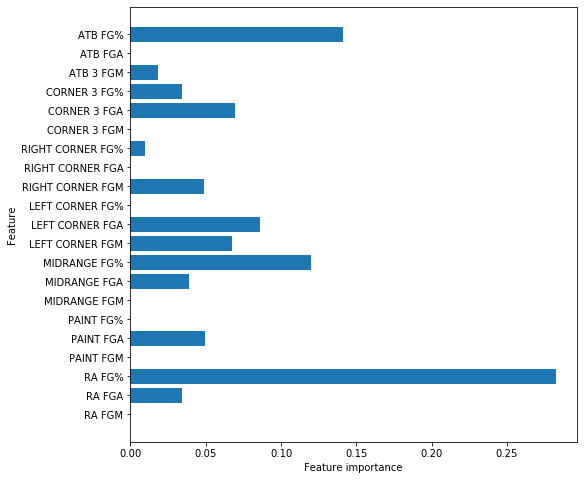

In [366]:
tree_model(team_shooting, 'entropy', 5)

Train Accuracy:  0.7668810289389068
Test Accuracy:  0.6166666666666667
[[32 22]
 [24 42]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        54
           1       0.66      0.64      0.65        66

    accuracy                           0.62       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.62      0.62      0.62       120



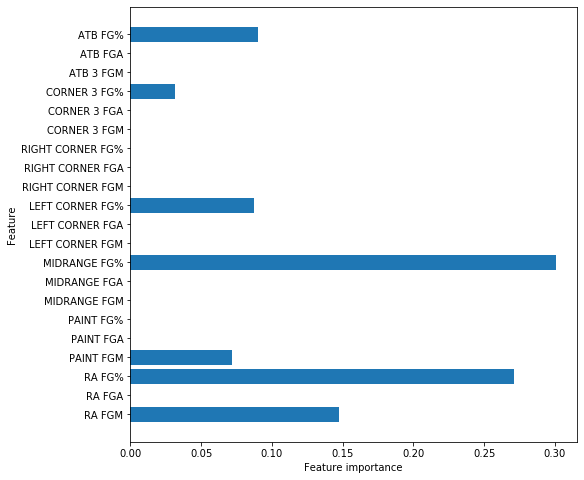

In [367]:
tree_model(opponent_shooting, 'entropy', 4)

### Hyperparameters Tuning

In [368]:
from sklearn.model_selection import GridSearchCV
def optimum_model(data):
    '''Takes in a dataframe and returns the classifier but fitted
    with the best hyperparamters using scikit's GridSearchCV. Hyperparameters
    to compare are already chosen inside the function as well as their possible values.'''
    
    X_train_tree, X_test_tree, y_train_tree, y_test_tree = preprocessing(data,'PLAYOFFS')
    clf = DecisionTreeClassifier()
    
    param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 10],
    'min_samples_split': [3, 5, 10, 20]
    }
        
  
    gs_tree = GridSearchCV(clf, param_grid, cv=3)
    gs_tree.fit(X_train_tree, y_train_tree)
    
    y_hat_test = gs_tree.predict(X_test_tree)
    y_hat_train = gs_tree.predict(X_train_tree)
    
    y_hat_train = gs_tree.predict(X_train_tree)
    print('Train Accuracy: ', accuracy_score(y_train_tree, y_hat_train))
    
    y_hat_test = gs_tree.predict(X_test_tree)
    print('Test Accuracy: ', accuracy_score(y_test_tree, y_hat_test))
    
    #plot_feature_importances(gs_tree)
    
    print(confusion_matrix(y_hat_test, y_test_tree))
    print(classification_report(y_hat_test, y_test_tree))



By using Scikit's GridSearchCV we can systematically look for the best combination of hyperparameters to feed our model and use. 

In [369]:
optimum_tree = optimum_model(team_shooting)

Train Accuracy:  0.7106109324758842
Test Accuracy:  0.6583333333333333
[[41 26]
 [15 38]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        67
           1       0.59      0.72      0.65        53

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.67      0.66      0.66       120



Even though none of the individual decision trees did as good as the logistic regression, their insights proved to be worthy of our time. We can try our luck by trying an ensemble mehtod that uses many of these trees to make a better model:

## Ensemble Methods

### Random Forest

In [378]:
def forest_model(data, estimators, depth):
    X_train_forest, X_test_forest, y_train_forest, y_test_forest = preprocessing(data,'PLAYOFFS')
    
    forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth)
    forest.fit(X_train_forest, y_train_forest)
    y_hat_test = forest.predict(X_test_forest)
    print(classification_report(y_hat_test, y_test_forest))
    
    print(forest.score(X_test_forest, y_test_forest))
    plot_feature_importances(forest, X_train_forest)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        55
           1       0.78      0.77      0.78        65

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120

0.7583333333333333


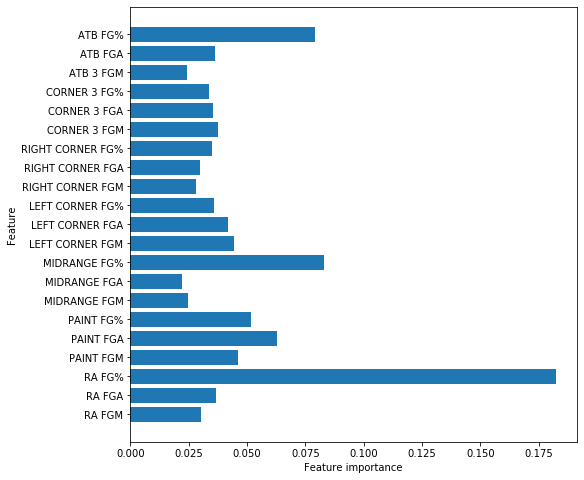

In [379]:
forest_model(team_shooting, 100, 5)

A very important benefit of using Random forests is that there is a lot of interpretability. Since each tree in the random forest is a Glass-Box Model (as opposed to black box ones) we can see how our random forest thinks certain parameters helped it get to that decision.

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        46
           1       0.80      0.69      0.74        74

    accuracy                           0.70       120
   macro avg       0.69      0.70      0.69       120
weighted avg       0.72      0.70      0.70       120

0.7


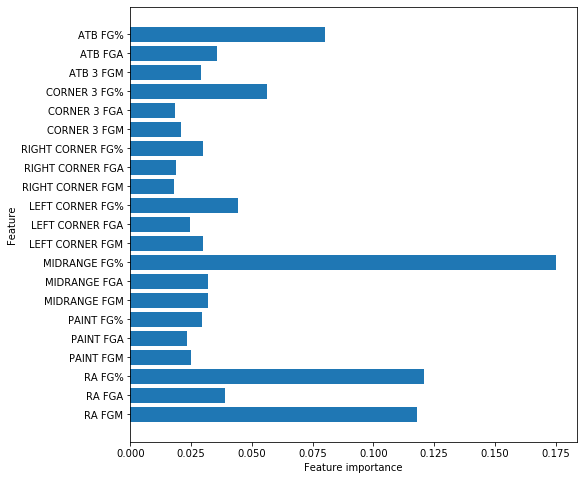

In [380]:
forest_model(opponent_shooting, 100, 5)

Again we notice that our most important indicator is the midrange FG%

Finally, let's use our test data to see how our selected logistic regression models do against one another. Remember we selected the models after we removed multicollinearity:

In [397]:
print(classification_report(y_hat_offense, y_test))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        63
           1       0.69      0.77      0.73        57

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.72       120
weighted avg       0.73      0.72      0.72       120



In [398]:
print(classification_report(y_hat_deffense, y_test))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        58
           1       0.69      0.71      0.70        62

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.68      0.68      0.68       120



No big pattern or insight jumps out of our research from our defense vs offense models. This *could* be due to the small amount of data. 

# Conclussions

Three basic conclussions:

- One actual difference between offense and defense is that teams that struggle guarding the midrange are considerably less likely (2x less probable for every standard deviation away from the mean) to make it to the playoffs. On the other hand teams that shoot a midrange % that is one standard deviation away from the mean are 1.5x more likely to make it to the playoffs.

- Based on this project, there is no clear advantage of using a model that only reads offensive stats and another one that only reads deffensive stats. Based on model metrics, there is no definitive winner on classifying playoff teams.  
- There is much work to do in shot location based modeling. Different models threw different results. We can learn a lot about the league and interpret results this way. 

## Next Steps:


Gather much more data. This can be done in many ways. Shooting location can be done by game and the target value be win or loss by the team. That way a lot of data can be obtained. 

Try shot distance and other models instead of categorical "Shot location" format